### Import de bibliotecas

In [2]:
# brew services start mysql
#!/usr/bin/env python3
# mysql -u root -p

import pandas as pd
import mysql.connector
import requests
import time
import random
import matplotlib.pyplot as pt
import numpy as np


In [ ]:
peso_da_sobra = round(random.uniform(100,300), 2) #recebe informação de uma balança (simulação)
print(f'A balança aferiu uma sobra de {peso_da_sobra}g')

peso_dieta_ideal = 300

ajust = 1-(peso_da_sobra - int(peso_da_sobra))
peso_da_sobra_ajust = peso_da_sobra + ajust

peso_da_reposicao = peso_dieta_ideal - peso_da_sobra_ajust
time.sleep(3)
print(f"O peso da reposição será de: {peso_da_reposicao}g.")
time.sleep(3)

peso_inicial = peso_da_sobra_ajust
i=1
pontos = ""


while peso_inicial < peso_dieta_ideal:
    peso_inicial += 1
    i += 1
    if i % 3 == 0:
        pontos += "🌽"
    else:
        pontos += ""
    
    time.sleep(0.1)
    print(f"Peso atual do comedouro em: {peso_inicial} gm.  {pontos}🐔")


time.sleep(3)
print("")
print("> COMEDOURO ABASTECIDO COM SUCESSO <")
print("")

A balança aferiu uma sobra de 119.68g
O peso da reposição será de: 180.0g.
Peso atual do comedouro em: 121.0 gm.  🐔
Peso atual do comedouro em: 122.0 gm.  🌽🐔
Peso atual do comedouro em: 123.0 gm.  🌽🐔
Peso atual do comedouro em: 124.0 gm.  🌽🐔
Peso atual do comedouro em: 125.0 gm.  🌽🌽🐔
Peso atual do comedouro em: 126.0 gm.  🌽🌽🐔
Peso atual do comedouro em: 127.0 gm.  🌽🌽🐔
Peso atual do comedouro em: 128.0 gm.  🌽🌽🌽🐔
Peso atual do comedouro em: 129.0 gm.  🌽🌽🌽🐔
Peso atual do comedouro em: 130.0 gm.  🌽🌽🌽🐔
Peso atual do comedouro em: 131.0 gm.  🌽🌽🌽🌽🐔
Peso atual do comedouro em: 132.0 gm.  🌽🌽🌽🌽🐔
Peso atual do comedouro em: 133.0 gm.  🌽🌽🌽🌽🐔
Peso atual do comedouro em: 134.0 gm.  🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 135.0 gm.  🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 136.0 gm.  🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 137.0 gm.  🌽🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 138.0 gm.  🌽🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 139.0 gm.  🌽🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 140.0 gm.  🌽🌽🌽🌽🌽🌽🌽🐔
Peso atual do comedouro em: 141.0 g

Connected to MySQL!
    id        date            time  sobra  reposicao
0    2  2024-11-10 0 days 08:30:00  119.0      181.0
1    3  2024-11-11 0 days 08:30:00  131.0      169.0
2    4  2024-11-12 0 days 08:30:00  214.0       86.0
3    5  2024-11-13 0 days 08:30:00  299.0        1.0
4    6  2024-11-14 0 days 08:30:00  127.0      173.0
5    7  2024-11-15 0 days 08:30:00  120.0      180.0
6    8  2024-11-16 0 days 08:30:00  246.0       54.0
7    9  2024-11-17 0 days 08:30:00  248.0       52.0
8   10  2024-11-18 0 days 08:30:00  234.0       66.0
9   11  2024-11-19 0 days 08:30:00  290.0       10.0
10  12  2024-11-20 0 days 08:30:00  243.0       57.0
11  13  2024-11-21 0 days 08:30:00  167.0      133.0


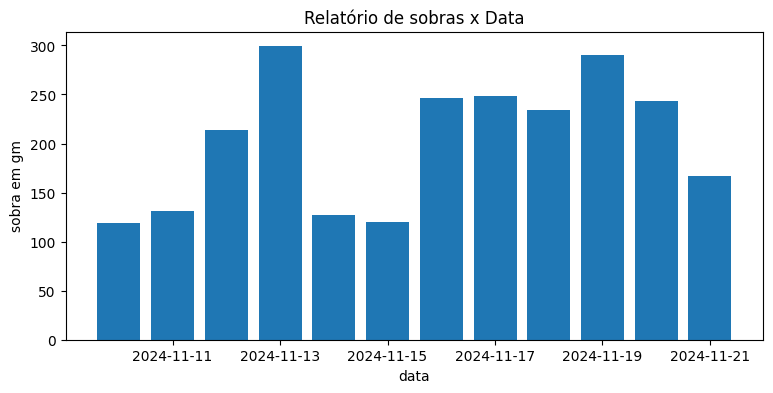

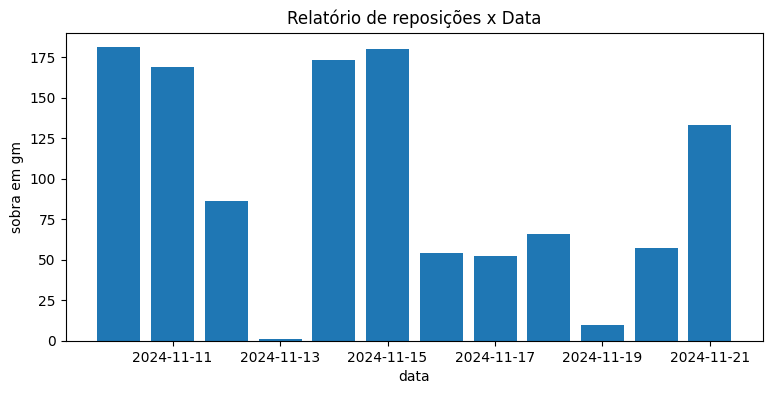

In [12]:

try:
    connection = mysql.connector.connect(
        host="localhost",
        user="root",
        password="test123",
        database="db_avicultura_proj"
    )

    if connection.is_connected():
        
        print("Connected to MySQL!")

        cursor = connection.cursor()

        # # Input de dados do dia
        # query = f'INSERT INTO sobras (date,time,sobra,reposicao) VALUES("2024-11-21","08:30:00","{peso_da_sobra_ajust}","{peso_da_reposicao}")'
        # cursor.execute(query)
        # connection.commit()
        
        query2 = f'SELECT * FROM sobras'
        cursor.execute(query2)
        rows = cursor.fetchall()
        
        column_names = [description[0] for description in cursor.description]

        
        df = pd.DataFrame(rows, columns=column_names)
        print(df)
        pt.figure(figsize=(9, 4)) 
        pt.bar(df['date'],df['sobra'], label='dados')
        pt.xlabel('data')
        pt.ylabel('sobra em gm')
        pt.title('Relatório de sobras x Data')
        pt.show()
        
        pt.figure(figsize=(9, 4)) 
        pt.bar(df['date'],df['reposicao'], label='dados')
        pt.xlabel('data')
        pt.ylabel('sobra em gm')
        pt.title('Relatório de reposições x Data')
        pt.show()

        
except mysql.connector.Error as err:
    print("Error while connecting to MySQL:", err)

